# DECISION TREE ALGORITHM

**Decision Tree** is a supervised learning algorithm, that is basically a tress like structured classifier. It is used to deal with both classification and regression problems in machine learning. You can also think of a decision tree as a machine learning algorithm that uses a decision tree to make predictions, you can think of it as so when you are using the term in machine learning land.

# HOW DOES IT WORK?

# CLassify Lion and a Giraffe

# Thing you might consider

- Height
- Weight
- color
 etc...

![](../images/decisionTree1.png)

# Main parts of a decision tree include:

- Decision nodes

>Parent node

>Child node
- Leaf nodes

**Root node**: Root node is from where the decision tree starts. It represents the entire dataset, which further gets divided into two or more homogeneous sets.

**Branches, edges or decision nodes**: This extend from the root node or other nodes above it. They ara also called sub trees.

**Decisions or leafs nodes**: These are the end of a branch that does not split into further branches. They are the outputs of the decision.

# What algorithm is used to build a decision tree?

The CART algoritm is used to construct a decision tree. CART stands for Classification And Regression Tree. At this point you might be asking yourself why the word Regression is used to name a decision tree algorithm, well decision trees are also used for Regression problems as stated earlier.

# Attribute Selection

From the examples we have seen about deciding to keep or throw away an item was quite straight forward.To select the root node and sub-nodes was quite easy. But how does decision tree algorithm decide the root node and sub-nodes to use? Decision tree algorithms use a technique known as Attribute Selection Measure ASM. There are two main ASM used:

- [Entropy and information gain](https://towardsdatascience.com/entropy-how-decision-trees-make-decisions-2946b9c18c8)
> Degree of randomness
- [Gini index and information gain](https://medium.com/analytics-steps/understanding-the-gini-index-and-information-gain-in-decision-trees-ab4720518ba8#:~:text=Gini%20Index%2C%20also%20known%20as,it%20can%20be%20called%20pure.)

# Practical Section

In [94]:
import pandas as pd

In [95]:
iris = pd.read_csv("../datasets/Iris.csv")

In [96]:
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [97]:
iris.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [98]:
iris['Species'] = iris['Species'].replace({'Iris-setosa' : 0, 'Iris-versicolor' : 1,  'Iris-virginica' : 2})

In [99]:
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2


In [101]:
x = iris.drop(["Species"], axis=1)
y = iris['Species']

In [102]:
from sklearn.model_selection import train_test_split

In [104]:
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=200)

In [106]:
X_train.shape

(120, 5)

In [107]:
X_test.shape

(30, 5)

In [111]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [109]:
dtree = DecisionTreeClassifier()

In [110]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

[Text(200.88000000000002, 181.2, 'X[0] <= 101.0\ngini = 0.667\nsamples = 120\nvalue = [39, 40, 41]\nclass = Iris-virginica'),
 Text(133.92000000000002, 108.72, 'X[0] <= 50.5\ngini = 0.5\nsamples = 79\nvalue = [39, 40, 0]\nclass = Iris-versicolor'),
 Text(66.96000000000001, 36.23999999999998, 'gini = 0.0\nsamples = 39\nvalue = [39, 0, 0]\nclass = Iris-setosa'),
 Text(200.88000000000002, 36.23999999999998, 'gini = 0.0\nsamples = 40\nvalue = [0, 40, 0]\nclass = Iris-versicolor'),
 Text(267.84000000000003, 108.72, 'gini = 0.0\nsamples = 41\nvalue = [0, 0, 41]\nclass = Iris-virginica')]

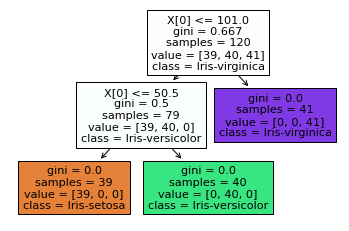

In [112]:
cn = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
plot_tree(dtree, class_names = cn, filled=True)

In [113]:
predictions = dtree.predict(X_test)

In [125]:
from sklearn.metrics import classification_report, confusion_matrix

In [116]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.91      1.00      0.95        10
           2       1.00      0.89      0.94         9

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



In [126]:
cm = confusion_matrix(y_test, predictions)

In [127]:
cm

array([[11,  0,  0],
       [ 0, 10,  0],
       [ 0,  1,  8]])

In [130]:
import seaborn as sns
from matplotlib import pyplot as plt

<AxesSubplot:>

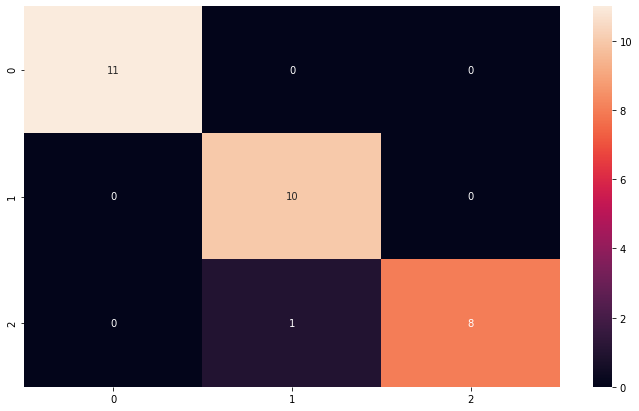

In [131]:
plt.figure(figsize=(12, 7))
sns.heatmap(cm, annot=True)